<a href="https://colab.research.google.com/github/Iroyoshi/Data-Exploratory-Analysis/blob/main/Introducci%C3%B3n/Introducci%C3%B3n_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al Análisis Exploratorio de Datos.**


![image](https://static.vecteezy.com/system/resources/previews/003/206/623/original/youtube-editorial-app-icon-free-vector.jpg)

YouTube is an American online video sharing and social media platform headquartered in San Bruno, California.

It was launched on February 14, 2005, by Steve Chen, Chad Hurley, and Jawed Karim. Owned by Google, it is the second most visited website,
right after Google itself.

YouTube has more than one billion monthly users who collectively watch more than one billion hours of videos each day.
As of May 2019, videos were being uploaded at a rate of more than 500 hours of content per minute.

# Database

https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023

Welcome to the captivating realm of YouTube stardom, where this meticulously curated dataset unveils the statistics of the most subscribed YouTube channels. A collection of YouTube giants, this dataset offers a perfect avenue to analyze and gain valuable insights from the luminaries of the platform. With comprehensive details on top creators' subscriber counts, video views, upload frequency, country of origin, earnings, and more, this treasure trove of information is a must-explore for aspiring content creators, data enthusiasts, and anyone intrigued by the ever-evolving online content landscape. Immerse yourself in the world of YouTube success and unlock a wealth of knowledge with this extraordinary dataset.




In [ ]:
# Here we charge some important libraries
import pandas as pd
import numpy as np


#For Visualization
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from math import pi
from wordcloud import WordCloud


#Set Option
pd.set_option("display.max_columns",None)
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('ggplot')
%matplotlib inline

color_scheme = px.colors.sequential.Peach

### **Load Data**

In [ ]:
df = pd.read_csv('GlobalYouTubeStatistics.csv', encoding='iso-8859-1')

## **Understanding Data**

### **Show DataFrame**

In [ ]:
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,525.0,55.0,172.0,5.525130e+08,138100.0,2200000.00,1700000.00,2.650000e+07,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,6141.0,125.0,69.0,6.473500e+07,16200.0,258900.00,194200.00,3.100000e+06,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,129005.0,867.0,1202.0,6.703500e+04,17.0,268.00,201.00,3.200000e+03,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,35112.0,4.0,69.0,3.871000e+06,968.0,15500.00,11600.00,1.858000e+05,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


### **Column Names**

In [ ]:
list(df.columns)

['rank',
 'Youtuber',
 'subscribers',
 'video views',
 'category',
 'Title',
 'uploads',
 'Country',
 'Abbreviation',
 'channel_type',
 'video_views_rank',
 'country_rank',
 'channel_type_rank',
 'video_views_for_the_last_30_days',
 'lowest_monthly_earnings',
 'highest_monthly_earnings',
 'lowest_yearly_earnings',
 'highest_yearly_earnings',
 'subscribers_for_last_30_days',
 'created_year',
 'created_month',
 'created_date',
 'Gross tertiary education enrollment (%)',
 'Population',
 'Unemployment rate',
 'Urban_population',
 'Latitude',
 'Longitude']

<details>

**<summary>Key Features</summary>**


*   rank: Position of the YouTube channel based on the number of subscribers
*   Youtuber: Name of the YouTube channel
*   subscribers: Number of subscribers to the channel
*   video views: Total views across all videos on the channel
*   category: Category or niche of the channel
*   Title: Title of the YouTube channel
*   uploads: Total number of videos uploaded on the channel
*   Country: Country where the YouTube channel originates
*   Abbreviation: Abbreviation of the country
*   channel_type: Type of the YouTube channel (e.g., individual, brand)
*   video_views_rank: Ranking of the channel based on total video views
*   country_rank: Ranking of the channel based on the number of subscribers within its country
*   channel_type_rank: Ranking of the channel based on its type (individual or brand)
*   video_views_for_the_last_30_days: Total video views in the last 30 days
*   lowest_monthly_earnings: Lowest estimated monthly earnings from the channel
*   highest_monthly_earnings: Highest estimated monthly earnings from the channel
*   lowest_yearly_earnings: Lowest estimated yearly earnings from the channel
*   highest_yearly_earnings: Highest estimated yearly earnings from the channel
*   subscribers_for_last_30_days: Number of new subscribers gained in the last 30 days
*   created_year: Year when the YouTube channel was created
*   created_month: Month when the YouTube channel was created
*   created_date: Exact date of the YouTube channel's creation
*   Gross tertiary education enrollment (%): Percentage of the population enrolled in tertiary education in the country
*   Population: Total population of the country
*   Unemployment rate: Unemployment rate in the country
*   Urban_population: Percentage of the population living in urban areas
*   Latitude: Latitude coordinate of the country's location
*   Longitude: Longitude coordinate of the country's location

To know data types is very important when you want to use it. For example, when applying a function to transform data or extract a characteristic of it.

In [ ]:
df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

## **Pre-Processing Data**

### **Based on the objectives of the project you want to select only the relevant information.**

In [ ]:
# You can create objetcs that will be stored ond hardisk
# For example, a list.
Drop_Columns = ['Title','Abbreviation','channel_type','Latitude',
                'Longitude','created_month','channel_type_rank',
                'highest_monthly_earnings','lowest_monthly_earnings','created_date']

# Drop the columns you don't need
df.drop(Drop_Columns,axis=1,inplace=True)

# Show the new Table of Dataframe
df.head(5)

,rank,Youtuber,subscribers,video views,category,uploads,Country,video_views_rank,country_rank,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
0,1,T-Series,245000000,2.280000e+11,Music,20082,India,1.0,1.0,2.258000e+09,6800000.00,1.084000e+08,2000000.0,2006.0,28.1,1.366418e+09,5.36,471031528.0
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,1,United States,4055159.0,7670.0,1.200000e+01,0.04,5.800000e-01,NaN,2006.0,88.2,3.282395e+08,14.70,270663028.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,741,United States,48.0,1.0,1.348000e+09,4000000.00,6.470000e+07,8000000.0,2012.0,88.2,3.282395e+08,14.70,270663028.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,966,United States,2.0,2.0,1.975000e+09,5900000.00,9.480000e+07,1000000.0,2006.0,88.2,3.282395e+08,14.70,270663028.0
4,5,SET India,159000000,1.480000e+11,Shows,116536,India,3.0,2.0,1.824000e+09,5500000.00,8.750000e+07,1000000.0,2006.0,28.1,1.366418e+09,5.36,471031528.0


### **Missing values tells you which part of data needs a more deep attention.**

In [ ]:
# Total Count of NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame :\n\n",
      df.isnull().sum())

 
Count total NaN at each column in a DataFrame :

 rank                                         0
Youtuber                                     0
subscribers                                  0
video views                                  0
category                                    46
uploads                                      0
Country                                    122
video_views_rank                             1
country_rank                               116
video_views_for_the_last_30_days            56
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               337
created_year                                 5
Gross tertiary education enrollment (%)    123
Population                                 123
Unemployment rate                          123
Urban_population                           123
dtype: int64


### **For example, check which Countries have NAN values**

In [ ]:
df[df['Country'].isnull()==True]

,rank,Youtuber,subscribers,video views,category,uploads,Country,video_views_rank,country_rank,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
5,6,Music,119000000,0.000000e+00,NaN,0,NaN,4057944.0,NaN,NaN,0.00,0.00,NaN,2013.0,NaN,NaN,NaN,NaN
12,13,Gaming,93600000,0.000000e+00,NaN,0,NaN,4057944.0,NaN,NaN,0.00,0.00,NaN,2013.0,NaN,NaN,NaN,NaN
14,15,Goldmines,86900000,2.411823e+10,Film & Animation,1,NaN,4056562.0,NaN,18.0,0.05,0.86,NaN,2006.0,NaN,NaN,NaN,NaN
38,39,LooLoo Kids - Nursery Rhymes and Children's Songs,54000000,3.231243e+10,Music,11,NaN,3800129.0,NaN,159.0,0.48,8.00,NaN,2016.0,NaN,NaN,NaN,NaN
48,49,Badabun,46800000,1.939805e+10,Entertainment,1,NaN,4047729.0,NaN,440.0,1.00,21.00,75.0,2007.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958,959,Troom Troom PT,12500000,4.384178e+09,Howto & Style,2738,NaN,1667.0,NaN,13501000.0,40500.00,648100.00,NaN,2015.0,NaN,NaN,NaN,NaN
967,968,Troom Troom Indonesia,12500000,5.379684e+09,People & Blogs,8,NaN,4057418.0,NaN,1.0,0.00,0.05,NaN,2020.0,NaN,NaN,NaN,NaN
972,973,Hero Movies 2023,12400000,1.689091e+09,People & Blogs,689,NaN,6116.0,NaN,21837000.0,65500.00,1000000.00,NaN,2017.0,NaN,NaN,NaN,NaN
985,986,TKOR,12400000,3.392023e+09,Education,0,NaN,4057944.0,NaN,NaN,0.00,0.00,NaN,2006.0,NaN,NaN,NaN,NaN


In [ ]:
# First, take missing rows your matrix df; then, select category column; then, count the frequency;
# and finally, save it on category varaible.
category = df[df['Country'].isnull()==True].category.value_counts()

# Plot fancy Pie Chart of the frequency of missing values on each category
fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=px.colors.sequential.Blues)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="NA values per Category",
                  uniformtext_minsize=12,
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

### **When you are sure your analysis is not affected by the missing values (for example you are doing a linear regression on a massive dataset and have small number of missing values) you can drop all.**

In [ ]:
# First you drop all missing values and then you reset the index
youtube = df.dropna().reset_index()

### **First, we will change the some columns type of data from float to integer.**

In [ ]:
# Put attention on the syntaxis. Here we have the most common types of operations.
# First, you select a column by using DATAFRAME['Columname'] syntax.
# Second, you apply a function using a point o that colum followed by the function name (here astype())
# Finally, you save the result on a space in the harddisk. In this case !on the same variable name!

youtube['created_year'] = youtube['created_year'].astype('int64')
youtube['video views'] = youtube['video views'].astype('int64')
youtube['subscribers'] = youtube['subscribers'].astype('int64')

In [ ]:
youtube

,index,rank,Youtuber,subscribers,video views,category,uploads,Country,video_views_rank,country_rank,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
0,0,1,T-Series,245000000,228000000000,Music,20082,India,1.0,1.0,2.258000e+09,6800000.0,108400000.0,2000000.0,2006,28.1,1.366418e+09,5.36,471031528.0
1,2,3,MrBeast,166000000,28368841870,Entertainment,741,United States,48.0,1.0,1.348000e+09,4000000.0,64700000.0,8000000.0,2012,88.2,3.282395e+08,14.70,270663028.0
2,3,4,Cocomelon - Nursery Rhymes,162000000,164000000000,Education,966,United States,2.0,2.0,1.975000e+09,5900000.0,94800000.0,1000000.0,2006,88.2,3.282395e+08,14.70,270663028.0
3,4,5,SET India,159000000,148000000000,Shows,116536,India,3.0,2.0,1.824000e+09,5500000.0,87500000.0,1000000.0,2006,28.1,1.366418e+09,5.36,471031528.0
4,8,9,Like Nastya,106000000,90479060027,People & Blogs,493,Russia,630.0,5.0,4.894700e+07,146800.0,2300000.0,100000.0,2016,81.9,1.443735e+08,4.59,107683889.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,989,990,Migos ATL,12400000,6993406259,Music,99,United States,833.0,175.0,4.941200e+07,148200.0,2400000.0,100000.0,2012,88.2,3.282395e+08,14.70,270663028.0
551,990,991,Natan por Aï¿,12300000,9029609749,Sports,1200,Brazil,525.0,55.0,5.525130e+08,1700000.0,26500000.0,700000.0,2017,51.3,2.125594e+08,12.08,183241641.0
552,991,992,Free Fire India Official,12300000,1674409945,People & Blogs,1500,India,6141.0,125.0,6.473500e+07,194200.0,3100000.0,300000.0,2018,28.1,1.366418e+09,5.36,471031528.0
553,993,994,RobTopGames,12300000,374123483,Gaming,39,Sweden,35112.0,4.0,3.871000e+06,11600.0,185800.0,100000.0,2012,67.0,1.028545e+07,6.48,9021165.0


### **Imagine you want to know which are the unique values of category variable. Then, you want to use the function set()**

In [ ]:
set(youtube['category'])

{'Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'Howto & Style',
 'Movies',
 'Music',
 'News & Politics',
 'Nonprofits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Shows',
 'Sports',
 'Trailers'}

### **It is common you will use different type of granuariies when working with data. So how you get a glimpse of it state? You would use a bar plot of counts.**

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'People & Blogs'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, 'Comedy'),
  Text(5, 0, 'Education'),
  Text(6, 0, 'Film & Animation'),
  Text(7, 0, 'News & Politics'),
  Text(8, 0, 'Howto & Style'),
  Text(9, 0, 'Shows'),
  Text(10, 0, 'Science & Technology'),
  Text(11, 0, 'Sports'),
  Text(12, 0, 'Pets & Animals'),
  Text(13, 0, 'Trailers'),
  Text(14, 0, 'Nonprofits & Activism'),
  Text(15, 0, 'Movies'),
  Text(16, 0, 'Autos & Vehicles')])

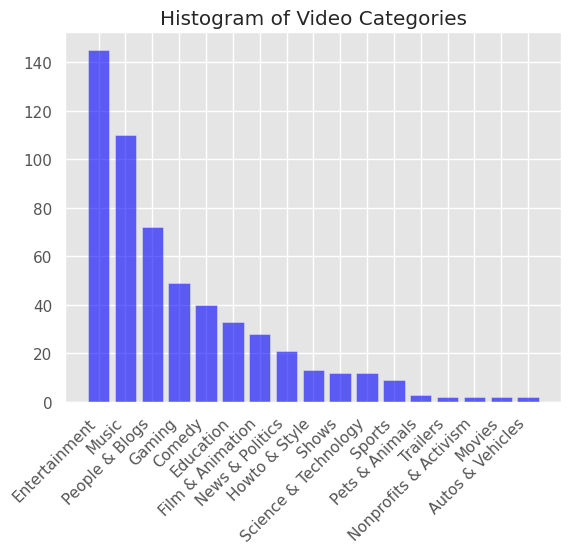

In [ ]:
# First, you want to set x and y variables

# Values or counts (its not frequency)
y = youtube['category'].value_counts()

# The categories
x = youtube['category'].value_counts().index

# Use plot function and set up the options
fig, ax = plt.subplots()
plt.bar(x,y,color='blue',alpha=0.6)
plt.title('Histogram of Video Categories')
plt.xticks(rotation=45, ha='right')

### **When you have a lot of data you want to calculate statistics in order to get a glimpse of the information of your database. One way is to use describe function()**

In [ ]:
youtube.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population
count,136935.000000,1.369350e+05,1.369350e+05,136935.000000,1.367330e+05,120990.000000,1.294890e+05,1.369350e+05,1.369350e+05,8.691600e+04,136064.000000,119963.000000,1.199630e+05,119963.000000,1.199630e+05
mean,495.472334,2.274870e+07,1.163046e+10,7953.262117,5.565516e+05,383.151798,1.677579e+08,4.274254e+05,6.847598e+06,3.368480e+05,2012.382291,63.530798,4.151772e+08,9.257335,2.186192e+08
std,285.403484,1.675583e+07,1.352914e+10,27712.738918,1.362252e+06,1198.267985,3.733560e+08,7.754087e+05,1.242965e+07,6.367196e+05,4.263444,25.698600,4.629290e+08,4.895985,1.522544e+08
min,1.000000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1970.000000,7.600000,2.025060e+05,0.750000,3.558800e+04
25%,245.000000,1.450000e+07,4.712624e+09,168.000000,2.790000e+02,11.000000,2.026300e+07,3.160000e+04,5.063000e+05,1.000000e+05,2009.000000,36.300000,6.962558e+07,4.690000,5.590832e+07
50%,498.000000,1.770000e+07,8.615619e+09,671.000000,8.010000e+02,50.000000,6.498900e+07,1.670000e+05,2.700000e+06,1.000000e+05,2013.000000,67.000000,3.282395e+08,9.710000,2.706630e+08
75%,741.000000,2.480000e+07,1.469600e+10,2726.000000,3.094000e+03,123.000000,1.699680e+08,4.756000e+05,7.600000e+06,4.000000e+05,2016.000000,88.200000,3.282395e+08,14.700000,2.706630e+08
max,995.000000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,6.589000e+09,6.900000e+06,1.106000e+08,8.000000e+06,2022.000000,113.100000,1.397715e+09,14.720000,8.429340e+08


### **You can also use a Pie Chart to visualize percentages. However, remember not using when you have many categories**

In [ ]:
# Build counts of categories
category = youtube['category'].value_counts()

# Make a interactive pie chart
fig = px.pie(values=category.values,
             names=category.index,
             color_discrete_sequence=px.colors.sequential.algae)
fig.update_traces(textposition='inside',
                  textfont_size=11,
                  textinfo='percent+label')

fig.update_layout(title_text="Category Pie Graph",
                  uniformtext_minsize=12,
                  uniformtext_mode='hide',
                  template ='ggplot2')

fig.show()

### **If you have a temporal variable you should try a point plot or timeline to observe the behavior over time of your data.**

Text(0.5, 1.0, 'Youtube Channel Counts Timeline')

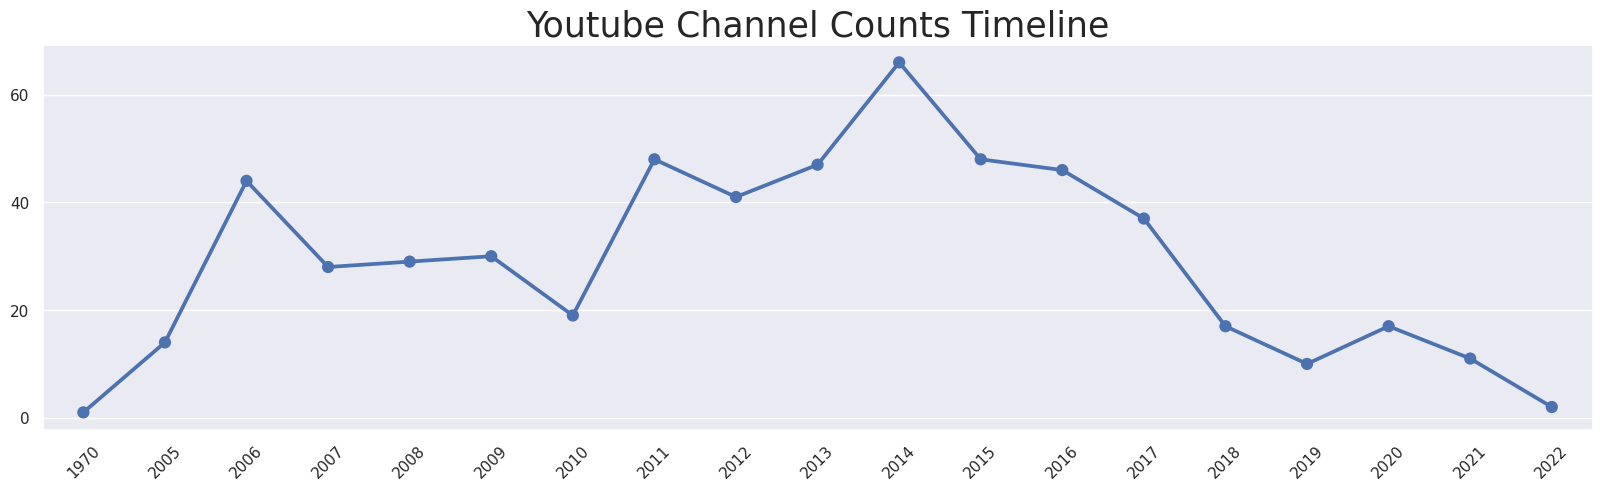

In [ ]:
year = youtube['created_year'].value_counts()
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.set(font_scale=2)
sns.pointplot(x=year.index, y=year.values).set_title('Youtube Channel Counts Timeline',fontsize=25)

### **You want to select a thinner granularity to observe in detail hidden behaviors that may potentially help you.**

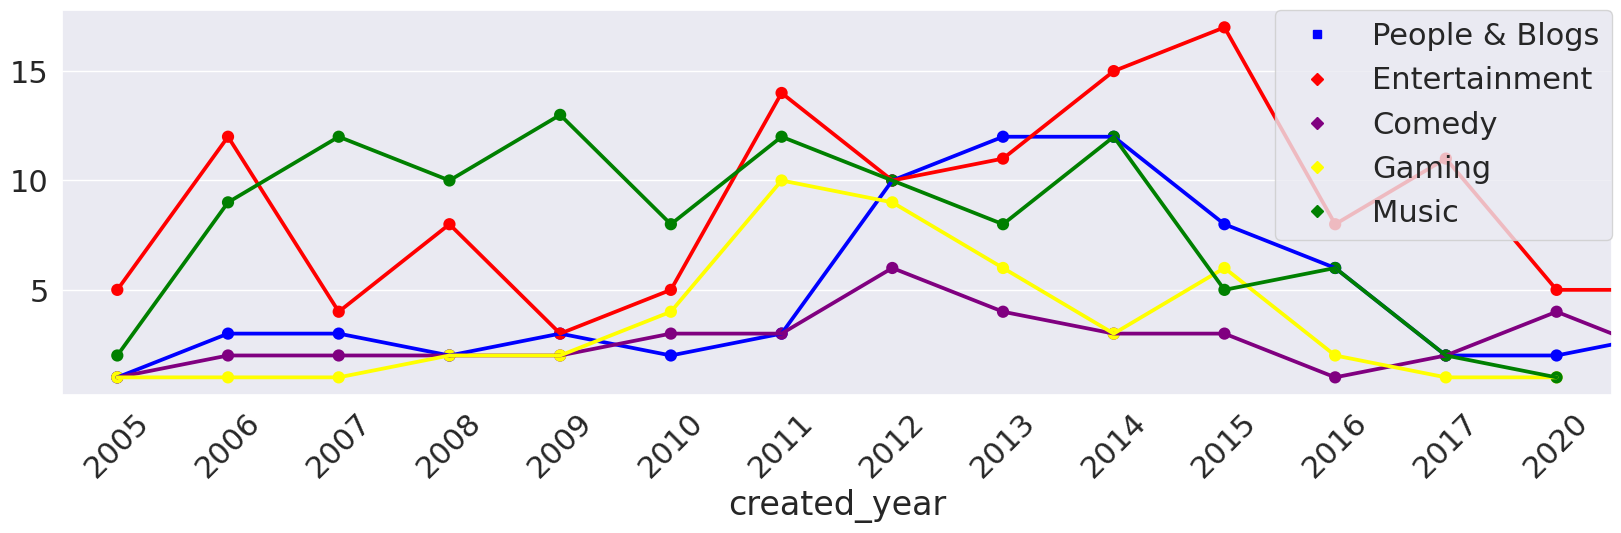

In [ ]:
Category_Year=youtube.groupby('category').created_year.value_counts()

fig = plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
sns.set(font_scale=2)
sns.pointplot(x=Category_Year['People & Blogs'].index, y=Category_Year['People & Blogs'].values,color='blue')
sns.pointplot(x=Category_Year['Entertainment'].index, y=Category_Year['Entertainment'].values,color='red')
sns.pointplot(x=Category_Year['Comedy'].index, y=Category_Year['Comedy'].values,color='purple')
sns.pointplot(x=Category_Year['Gaming'].index, y=Category_Year['Gaming'].values,color='yellow')
sns.pointplot(x=Category_Year['Music'].index, y=Category_Year['Music'].values,color='green')
#fig.legend(labels=['People & Blogs','Entertainment','Comedy','Gaming','Music'])

import matplotlib.lines as mlines

one = mlines.Line2D([], [], color='blue', marker='s', ls='', label='People & Blogs')
two = mlines.Line2D([], [], color='red', marker='D', ls='', label='Entertainment')
three = mlines.Line2D([], [], color='purple', marker='D', ls='', label='Comedy')
four = mlines.Line2D([], [], color='yellow', marker='D', ls='', label='Gaming')
five = mlines.Line2D([], [], color='green', marker='D', ls='', label='Music')
plt.legend(handles=[one, two, three, four, five], loc='upper right', borderaxespad=0.)


### **When working with a lot of data you may use the information of correlation between variables in order to find dependences and to reduce the amout of information you have to work with.**

<ipython-input-335-72d29e3d7efd>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



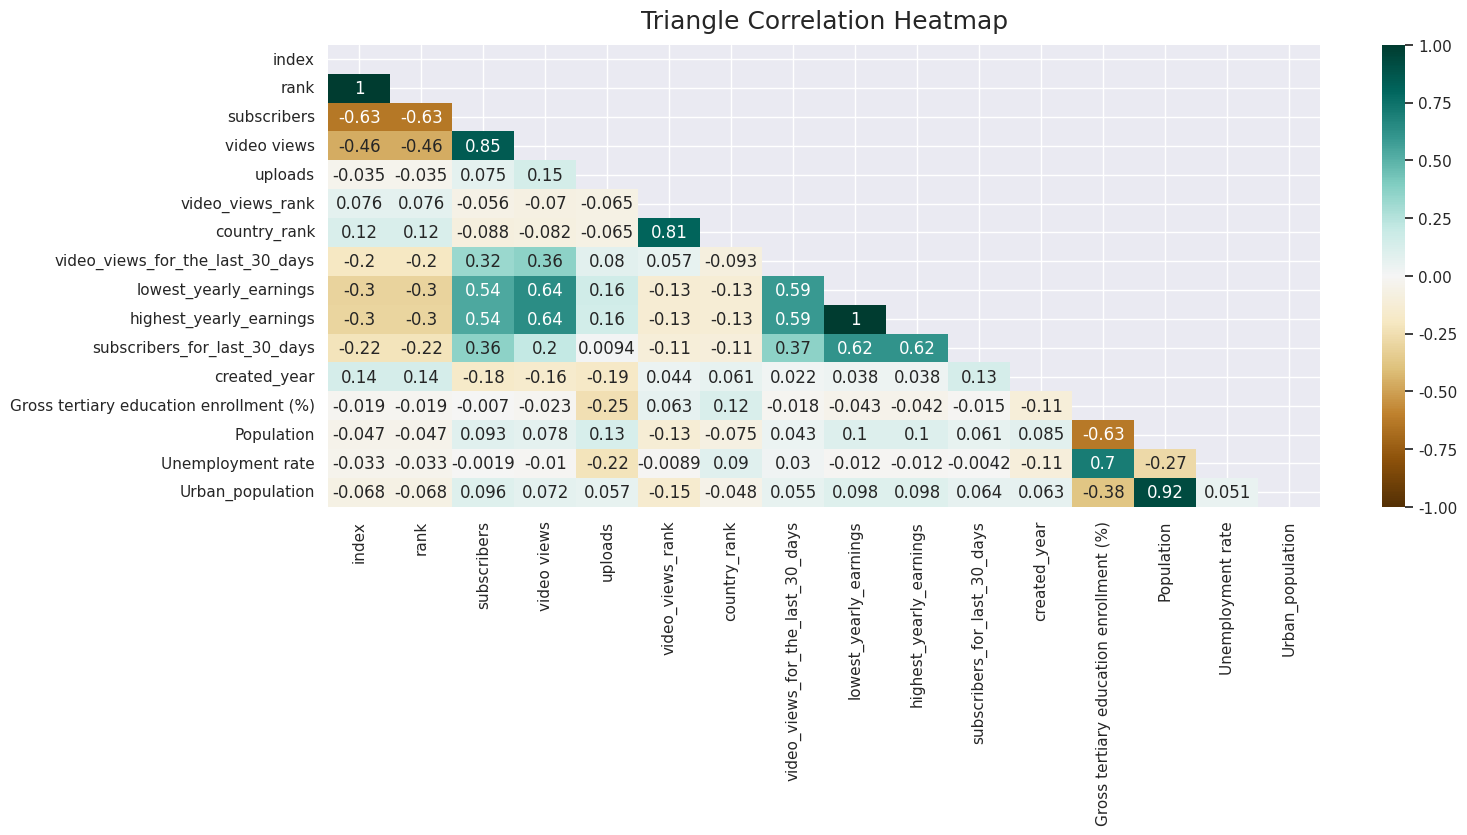

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
sns.set(font_scale=1)
mask = np.triu(np.ones_like(youtube.corr(numeric_only = True), dtype=np.bool))
heatmap = sns.heatmap(youtube.corr(numeric_only = True), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

### **Many times you will compare two variables to use a statistical model or a machine learning algorithm. Bar plots are excellent resource for finding insights.**

In [ ]:
categories = youtube.groupby('category').mean().subscribers.sort_values(ascending=False)

fig = go.Figure(data=px.bar(x=categories.index,
                            y=categories.values,
                            color = categories.index,
                            color_discrete_sequence=color_scheme,
                            title='Mean Subscribers by Category',
                            template = 'ggplot2',
                            text = np.round(categories.values/1000000,2),
                            height=500))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.show()

<ipython-input-344-0727cf476645>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### **Often you will work with categorical variables. Then use a map tree!**

In [ ]:
# Set the correct variables for treemap function
# Basically a number for each category group
a = youtube.groupby(['category'])['subscribers'].max()
most = youtube[youtube['subscribers'].isin(a.values)]

# Figure size
plt.figure(figsize=(10,5))
fig = px.treemap(most,
                 path=['category','Youtuber'],
                 values='subscribers',
                 title = ' Youtuber with most subscribers in each category',
                 color_discrete_sequence= color_scheme,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

<Figure size 1000x500 with 0 Axes>

### **Now we use the highest yearly earnings variable. Once you have the code, you can get a lot of new information.**

In [ ]:
a = youtube.groupby(['category'])['highest_yearly_earnings'].max()

most = youtube[youtube['subscribers'].isin(a.values)]

# plt.figure(figsize=(10,5))
fig = px.treemap(most,
                 path=['category','Youtuber'],
                 values='highest_yearly_earnings',
                 title = ' Youtuber with most earnings yearly in each category',
                 color_discrete_sequence= px.colors.sequential.Emrld,
                 width=1000, height=500)
fig.update_layout(template = 'ggplot2')
fig.show()

### **We most not forget the use of bar plots. They can be very simple, but can show us proportions in a more understable form than just numbers in a table.**

In [ ]:
fig = go.Figure(data=px.bar(x=most.category,
                            y=most.subscribers,
                            text = most.Youtuber,
                            orientation='v',
                            color=most.category,
                            color_discrete_sequence=px.colors.sequential.Sunsetdark,
                            title='Youtuber with most susbcribers in eacy categories',
                            height=600))

fig.update_layout(template = 'ggplot2')

fig.show()

# Conclusions

* In order to do a effective and efficient data analysis, it is very important to know the questions you want to answer.

* In addition it is fundamental to understand the information your are dealing with in terms of its procedence, what does it represent and how it must be treated.

* The EDA can be done with numbers and tables and with visualizations. The former are more exact, but the latter are more understable.

# Bibliography

### Data Analytics Made AccessibleCopyright © 2014-20 by Anil K. Maheshwari, Ph.D.

### Python for Everybody, Exploring Data Using Python 3, Charles R. Severance.

### Data Science from Scratch, First Principles with Python Joel Grus.

# **Online Resources**



1.   https://www.kaggle.com/code/wonduk/eda-on-top100-youtube-channel-dataset
2.   https://www.kaggle.com/code/okonyeolisemeke/eda-for-global-youtube-statistics-2023

